<a href="https://colab.research.google.com/github/OliMations/uoeHeartDiseasePrediction/blob/main/SVM_heart_mon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/microvision/heart-disease-exploratory-data-analysis/notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn import metrics

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/OliMations/uoeHeartDiseasePrediction/main/heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age -> Age
sex -> Sex
cp -> Chest_pain_type
trestbps -> Resting_bp
chol -> Cholesterol
fbs -> Fasting_bs
restecg -> Resting_ecg
thalach -> Max_heart_rate
exang -> Exercise_induced_angina
oldpeak -> ST_depression
slope -> ST_slope
ca -> Num_major_vessels
thal -> Thallium_test
target -> Condition

In [ ]:
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 
              'Cholesterol', 'Fasting_bs', 'Resting_ecg', 
              'Max_heart_rate', 'Exercise_induced_angina', 
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition']
df.head(100)

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1


In [ ]:
df.

(303, 14)

In [ ]:
results = df['Condition'].value_counts()
values = [results[0], results[1]]
labels = ['Benign', 'Malignant']
colors = ['Red', 'Blue']
    
fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
py.iplot([fig_pie])

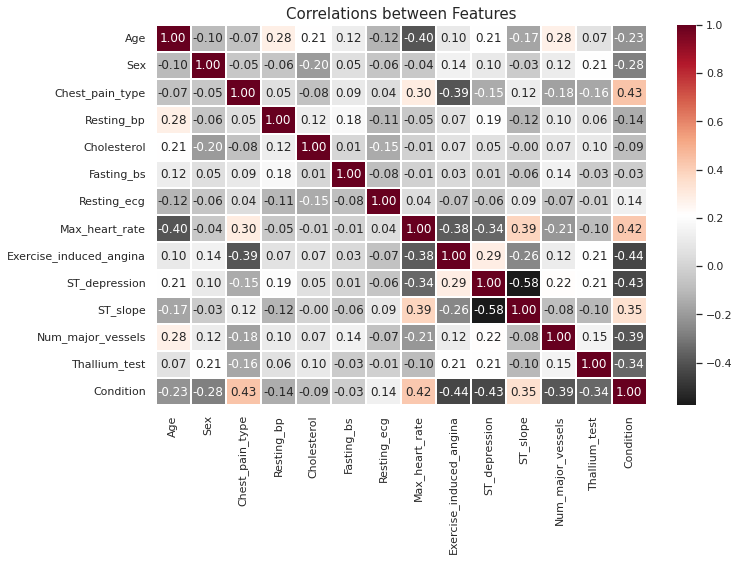

In [ ]:
plt.figure(figsize=(11, 7))
sns.heatmap(df.corr(), annot=True, linewidth=0.2, 
          fmt='.2f', cmap='RdGy_r')
plt.title('Correlations between Features', fontsize=15)
plt.show()

In [ ]:
# X = X = df[['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 
#               'Cholesterol', 'Fasting_bs', 'Resting_ecg', 
#               'Max_heart_rate', 'Exercise_induced_angina', 
#               'ST_depression', 'ST_slope', 'Num_major_vessels',
#               'Thallium_test']]

X = X = df[['Age', 'Sex', 'Chest_pain_type', 'Resting_ecg', 'Max_heart_rate', 'ST_depression', 'ST_slope']]
y = df.Condition

In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.33, random_state=42)
age = 66
sex = 1
cpt = 1
r_ecg = 1
mhr = 120
st_depr = 0
st_slope = 1

arr = np.array(X.iloc[118]).reshape(1, -1)
usr_data = pd.DataFrame(arr, columns=['Age', 'Sex', 'Chest_pain_type', 'Resting_ecg', 'Max_heart_rate', 'ST_depression', 'ST_slope'])

In [ ]:
X_train.shape
X_test.shape

(100, 7)

In [ ]:
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
usr_data.head()

,Age,Sex,Chest_pain_type,Resting_ecg,Max_heart_rate,ST_depression,ST_slope
0,46.0,0.0,1.0,1.0,172.0,0.0,2.0


In [ ]:
y_pred = clf.predict(usr_data)
print(usr_data)

# print(f"Accuracy: {metrics.accuracy_score(usr_data, y_pred)*100}")
print(y_pred)
# xg boost try

    Age  Sex  Chest_pain_type  Resting_ecg  Max_heart_rate  ST_depression  \
0  46.0  0.0              1.0          1.0           172.0            0.0   

   ST_slope  
0       2.0  
[1]
